# Introdução
Estre trabalho tem como objetivo a implementação do KNN e a previsão de sobreviventes do titanic utilizando os dados do kaggle. 

A previsão deve ser feita utilizando KNN e árvores de decisões, por último deve-se comparar qual previsão obteve os melhores resultados baseado nos parâmetros de acurácia, matriz de confusão, precisão, sensibilidade e F1-Score.


# 1. Importação das bibliotecas
Importação das bibliotecas necessárias para a execução do código.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from math import sqrt

# 2. Leitura dos dados de trenamento
Leitura dos dados do arquivo de trenamento 'train.csv' e amostragem dos dados.

In [ ]:
#ler data frame do arquivo de trenamento
df_train = pd.read_csv('train.csv')

#mostrar detalhes do arquivo de trenamento
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Remoção de dados
Observando a amostragem dos dados no passo 2 é possível analisar que existem colunas que não interferem na probabilidade daquele tripulante sobreviver ou não.

Essas colunas são removidas dos dados de trenamento.

In [ ]:
#colunas a serem removidas
drop_columns = ['PassengerId',
                'Name',
                'SibSp',
                'Parch',
                'Ticket',
                'Cabin']

df_train = df_train.drop(drop_columns, axis=1)

# 4. Atribuição de valores em células nulas
Observando os dados de trenamento é possível verificar que possuem células sem valores. O processo precisa de valores nessas células, por isso são atribuídos à estas células vazias os valores que ocorrem com mais frequência.

In [ ]:
print('Número de células sem valores nos dados de trenamento: ')
print(df_train.isnull().sum())
print('\n')

#preencher as células das colunas Age e Embarked que são nulas
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())

df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

print('Número de células sem valores nos dados de trenamento depois de preencher os dados: ')
print(df_train.isnull().sum())
print('\n')

Número de células sem valores nos dados de trenamento: 
Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64


Número de células sem valores nos dados de trenamento depois de preencher os dados: 
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64




# 5. Relação entre as colunas e sobrevivência
Para encontrar a relação das colunas com a probabilidade de sobrevivência, foram criados gráficos que facilitam a visualização dessa relação. Os Gráficos de "Age" e "Fare" foram criados com o valor médio, visto que são muitos dados para criar um gráfico para cada valor.

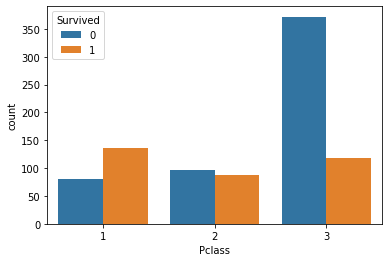

In [ ]:
sns.countplot(x='Pclass', data=df_train, hue='Survived')

                Age
Survived           
0         30.028233
1         28.291433


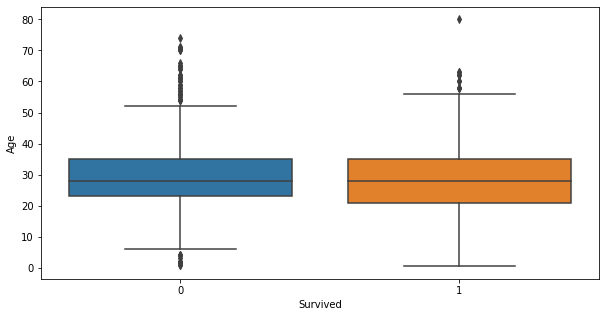

In [ ]:
# média de idades dos sobreviventes
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=df_train)

print(df_train.groupby('Survived').mean()[['Age']])

               Fare
Survived           
0         22.117887
1         48.395408


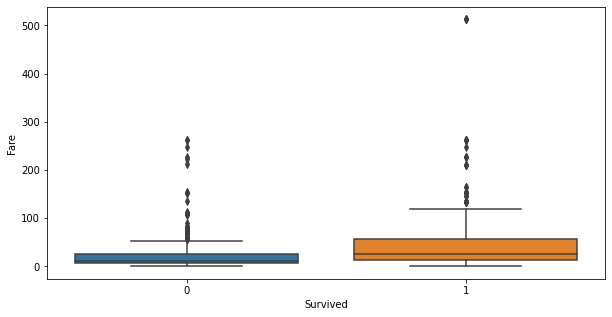

In [ ]:
# média da tarifa dos sobreviventes
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=df_train)

print(df_train.groupby('Survived').mean()[['Fare']])

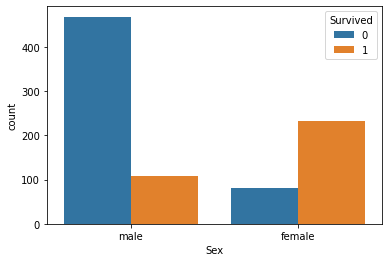

In [ ]:
sns.countplot(x='Sex', data=df_train, hue='Survived')

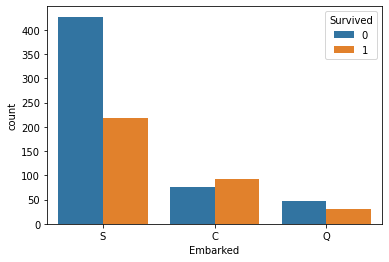

In [ ]:
sns.countplot(x='Embarked', data=df_train, hue='Survived')

# 6.Transformação em valores de texto
Para conseguir lidar com os valores de forma matemática, os valores de Sexo e de Embarcado são transformadas para valores numéricos.

In [ ]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1}).astype(int)

df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

# 7. Leitura dos dados de teste
Leitura dos dados do arquivo de teste 'test.csv' e cópia dos dados para backup.

In [ ]:
#ler data frame do arquivo de teste
df_test = pd.read_csv("test.csv")

#criar cópias do arquivo
df_test_copy = df_test.copy()

# 8. Remoção de dados
Para o arquivo de teste ter os mesmos dados de trenamento é realizado a remoção das colunas que não interferem na probabilidade daquele tripulante sobreviver ou não.


In [ ]:
#colunas a serem removidas
drop_columns = ['PassengerId',
                'Name',
                'SibSp',
                'Parch',
                'Ticket',
                'Cabin']

df_test = df_test.drop(drop_columns, axis=1)

# 9. Atribuição de valores em células nulas
Observando os dados de teste é possível verificar que possuem células sem valores. O processo precisa de valores nessas células, por isso são atribuídos à estas células vazias os valores que ocorrem com mais frequência.

In [ ]:
print('Número de células sem valores nos dados de teste: ')
print(df_test.isnull().sum())
print('\n')

#preencher as células das colunas Age, Fare e Embarked que são nulas
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())

df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mode()[0])

df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0])

print('Número de células sem valores nos dados de teste depois de preencher os dados: ')
print(df_test.isnull().sum())
print('\n')

Número de células sem valores nos dados de teste: 
Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64


Número de células sem valores nos dados de teste depois de preencher os dados: 
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64




# 10.Transformação em valores de texto
Para conseguir lidar com os valores de forma matemática, os valores de Sexo e de Embarcado são transformadas para valores numéricos.

In [ ]:
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1}).astype(int)

df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

# 11. Utilização do modelo e submissão dos resultados

Criação do Algoritmo do KNN

In [ ]:
def knn_predict(df_test, df_train, k):
  features = ['Pclass','Age','Fare','Sex','Embarked']
  all_features = ['Pclass','Age','Fare','Sex','Embarked', 'Survived']

  x_test = df_test[features].to_numpy()
  x_train = df_train[features].to_numpy()
  y_train = df_train['Survived'].tolist()

  _, _, _, y_test = \
    train_test_split(x_train, y_train, test_size=0.3, random_state=42)

  xy_train = df_train[all_features].to_numpy()

  predictions = []

  for test_item in x_test:
    distances = list()

    for train_item in xy_train:
      
      #calcula a distância euclidiana
      distance = 0.0

      for idx in range(len(test_item) - 1):
        distance += (test_item[idx] - train_item[idx]) ** 2

      euclidean_distance =  sqrt(distance)
      ##
      distances.append((train_item, euclidean_distance))

    distances.sort(key=lambda tup: tup[1])
    
    #seleciona os vizinhos
    neighbors = list()
    for i in range(k):
        neighbors.append(distances[i][0])
    ##

    output_values = [row[-1] for row in neighbors]

    predictions.append(max(set(output_values), key=output_values.count))

  print_knn_scores(predictions, y_test)
  return predictions

def print_knn_scores(predictions, y_test):
  print("KNN Scores: ")
  print("Matriz de confusão:\n", np.array(confusion_matrix(y_test, predictions)))
  print("Acurácia: ", accuracy_score(y_test, predictions))
  print("Precisão: ", precision_score(y_test, predictions))
  print("F1-score: ", f1_score(y_test, predictions))
  print('\n')

def confusion_matrix(test_set, predicted_set):
  matrix = [[0, 0],
            [0, 0]]
  for i in range(len(test_set)):
    matrix[int(test_set[i])][int(predicted_set[i])] += 1
  return matrix

def accuracy_score(test_set, predicted_set):
  correct_predictions = 0
  for i in range(len(test_set)):
    if test_set[i] == predicted_set[i]:
      correct_predictions += 1
  return correct_predictions / len(test_set)

def precision_score(test_set, predicted_set):
  matrix = confusion_matrix(test_set, predicted_set)
  return matrix[0][0] / (matrix[0][0] + matrix[1][0])

def recall_score(test_set, predicted_set):
  matrix = confusion_matrix(test_set, predicted_set)
  return matrix[0][0] / (matrix[0][0] + matrix[0][1])


def f1_score(test_set, predicted_set):
  precision = precision_score(test_set, predicted_set)
  recall = recall_score(test_set, predicted_set)
  return (2 * precision * recall) / (precision + recall)


Previsão utilizando KNN

In [ ]:
result = knn_predict(df_test, df_train, 29)

submit = df_test_copy[['PassengerId']].copy()
submit['Survived'] = result

print('Tamanho do vetor de sobreviventes: ', len(result))
print(submit.head())

submit.to_csv('result_knn_titanic.csv', index=False)

KNN Scores: 
Matriz de confusão:
 [[114  43]
 [ 84  27]]
Acurácia:  0.5261194029850746
Precisão:  0.5757575757575758
F1-score:  0.6422535211267606


Tamanho do vetor de sobreviventes:  418
   PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       0.0


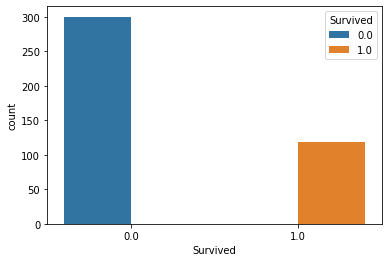

In [ ]:
df_result = pd.read_csv('result_knn_titanic.csv')
sns.countplot(x='Survived', data=df_result, hue='Survived')

Previsão utilizando árvore de decisão

In [ ]:
features = ['Pclass','Age','Fare','Sex','Embarked']
df_x = df_train.filter(features, axis=1)
df_y = df_train['Survived']

_, _, _, y_test = \
  train_test_split(df_x, df_y, test_size=0.469, random_state=40)

clf = tree.DecisionTreeClassifier()

clf.fit(df_x, df_y)

preds_test = clf.predict(df_test[features])


print('Matriz de confusão: \n', metrics.confusion_matrix(y_test, preds_test))
print('Acurácia: ', metrics.accuracy_score(y_test, preds_test))
print('Precisão: ', metrics.precision_score(y_test, preds_test))
print('Recall: ', metrics.recall_score(y_test, preds_test))
print('F1-Score: ', metrics.f1_score(y_test, preds_test))

submission = pd.DataFrame({ 'PassengerId': df_test_copy['PassengerId'],
                            'Survived': preds_test }, dtype=int)
submission.to_csv("result_tree_titanic.csv",index=False)


Matriz de confusão: 
 [[162 100]
 [ 87  69]]
Acurácia:  0.5526315789473685
Precisão:  0.40828402366863903
Recall:  0.4423076923076923
F1-Score:  0.4246153846153846


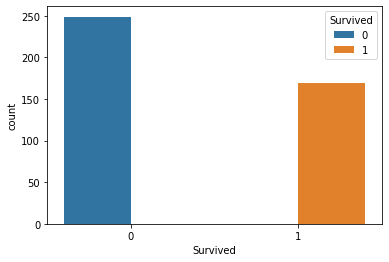

In [ ]:
df_result = pd.read_csv('result_tree_titanic.csv')
sns.countplot(x='Survived', data=df_result, hue='Survived')

# Conclusão
Neste trabalho foi apresentado o KNN e as árvores de decisão para a resolução do problema dos sobreviventes do titanic. Baseando-se nos dados de matriz de confusão, acurácia, precisão e F1-Score é possível analisar que o algoritmo do KNN teve resultados melhores que a Árvore de decisão.

# Referências
https://www.kaggle.com/c/titanic